# Hola Adriana! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo Adriana. Tu notebook está muy completo y está todo correcto. Sin embargo, falta que revises la existencia de outliers y los remueves, antes de pasar a los modelos. Revisa cómo cambian las conclusiones una vez realizado esto.
    
Saludos!    

</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho Adriana, si bien los modelos podrían tener mejores resultados, tu notebook está completo con todo lo requerido. Buen trabajo, está aprobado.
    
Saludos!    

</div>

----

# Sprint 12


En este proyecto se analiza la recuperacion de metales como oro, plata, plomo y se predice la recuperacion final y la recuperación de la  flotación. Se hace una limpieza de los datos y se corren distintos modelos para analizar cual es el que marca un menor SMAPE. 
(El minimo smape alcanzado fue de 159% sigue sindo muy alto, no se si haya alguna consideración que no haya tomado).

In [78]:
#importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [79]:
#lectura de datasets
df_full=pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True) # /Users/EQI/Documents/ATT/S11
df_test=pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
df_train=pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)

In [80]:
#Funcion para observar los datos, info, mediaa, maxima, duplicados, nulos
def observar_datos(data, head=5):
    print("##################### info #####################")
    print()
    print(data.info())
    print("##################### sample #####################")
    print()
    print(data.sample(head))
    print("##################### describe #####################")
    print()
   # print(data.describe())
    print("##################### duplicados #####################")
    print()
   # print(data.duplicated().sum())
    print("##################### nulos #####################")
    print()
    print(data.isna().sum())

In [81]:
observar_datos(df_full)

##################### info #####################

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  floa

In [82]:
observar_datos(df_train)

##################### info #####################

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  floa

In [83]:
observar_datos(df_test)

##################### info #####################

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9  

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien al mostrar parte de la data, pero te recomiendo usar `display()` para mostrar un dataframe, da mejor formato de output que `print()`. Por ejemplo, en vez de usar `print(df.head())`, usa `display(df.head())`.

</div>

In [84]:
# comprobacion de que la columna de recuperación sean datos segun la formula
def comprobacion_recuperacion(fila):
    numerador=fila['rougher.output.concentrate_au']*(fila['rougher.input.feed_au']-fila['rougher.output.tail_au'])
    denominador=fila['rougher.input.feed_au']*(fila['rougher.output.concentrate_au']-fila['rougher.output.tail_au'])
   
    return numerador/denominador*100
    

In [85]:
df_train_copy=df_train.copy()

In [86]:
df_train_copy['recuperacion']=df_train_copy.apply(lambda fila: comprobacion_recuperacion(fila), axis=1)

/tmp/ipykernel_324/518225688.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return numerador/denominador*100
/tmp/ipykernel_324/518225688.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return numerador/denominador*100


In [87]:
df_train_copy['recuperacion']

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Name: recuperacion, Length: 16860, dtype: float64

In [88]:
diferencia_real_vs_metrica= (df_train_copy['recuperacion'] - df_train_copy['rougher.output.recovery'])
print(diferencia_real_vs_metrica.abs().mean()) 

9.303415616264301e-15


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcta la comprobación del fórmula, vemos que es muy precisa.

</div>

Efectivamente el calculo de recuperacion confirma que la concentracion de extracción es la misma a la calculada por la formula ya que el error es sumamente pequeño entre el calculado y el de los obtenido como dato. 

In [89]:
#distinto numero de columnas para los datasets de entrenamiento y prueba
print(len(df_train.columns))
print(len(df_test.columns))

86
52


In [90]:
#analisis de las caracteristicas no disponibles en el conjunto te prueba
missed_test_columns=set(df_train.columns.values)- set(df_test.columns.values)

In [91]:
missed_test_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho, buen uso de `set()`

</div>

El tipo de datos que estan ausentes en los datos de prueba son las concentraciones de salida final, la salida de las colas, la concentracion para despues de la salida, tanto para los metales como las cola, asi como las concentraciones despues de la primera y segunda purificacion, todas estas se pueden considerar los objetivos a predecir,  por lo cual no se incluyen en los datos para prueba. Mientras que el calculo para la flotacion en proporcion del sultafo y oro puede no ser relevante como caractristica para para el dataset, por lo cual se descarta.

In [92]:
#Preprocesamiento de los datos, llenado de datos ausentes
df_full.isna().sum().sort_values(ascending=False)

rougher.output.recovery                               3119
rougher.output.tail_ag                                2737
rougher.output.tail_sol                               2736
rougher.output.tail_au                                2736
rougher.input.floatbank11_xanthate                    2257
                                                      ... 
rougher.calculation.floatbank10_sulfate_to_au_feed      44
primary_cleaner.state.floatbank8_b_level                43
primary_cleaner.state.floatbank8_c_level                43
primary_cleaner.state.floatbank8_d_level                43
primary_cleaner.input.feed_size                          0
Length: 86, dtype: int64

In [93]:
#llenado de las filas que estan vacias, se llenan ffill con el dato de la fila anterior
df_train=df_train.ffill()
#df_train=df_train.fillna(method='ffill')
#df_test=df_test.fillna(method='ffill')
df_test=df_test.ffill()
#df_full=df_full.fillna(method='ffill')
df_full=df_full.ffill()
df_train.isna().sum().sort_values(ascending=False)

final.output.concentrate_ag                   0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_e_air               0
                                             ..
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_b_level      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho, efectivamente, podemos aprovechar que la data son series de tiempo y que no deberían experimentar una variación enorme entre observaciones.

</div>

In [94]:
#lectura de datos de concentracion segun las distintas etapas del proceso
procesos= [
    'rougher.input.feed_{}',
    'rougher.output.concentrate_{}',
    'primary_cleaner.output.concentrate_{}',
    'final.output.concentrate_{}'
]

In [95]:
def grafico_proceso(material):
    pasos= [paso.format(material) for paso in procesos]
    for paso in pasos:
        df_full[paso].hist(alpha=0.5, bins=20)
    plt.legend(pasos)

Text(0.5, 1.0, 'Cambio en el concentrado de oro')

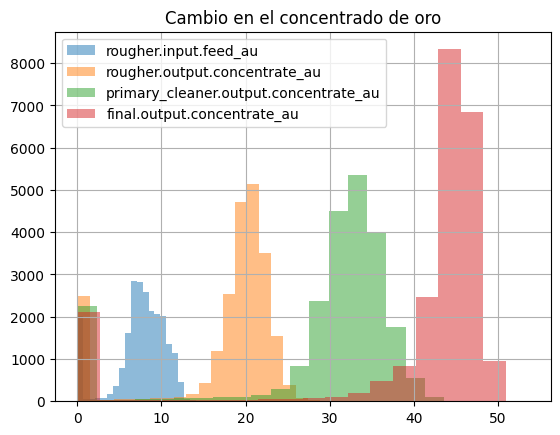

In [96]:
grafico_proceso('au')
plt.title('Cambio en el concentrado de oro')

In [97]:
#se observa que hay lecturas anomalas para cada proceso por lo cual se hace la limpieza de estos datos
df_full = df_full[~df_full[['rougher.input.feed_au','rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au','final.output.concentrate_au']].apply(lambda x: x.between(0, 3)).any(axis=1)]

Text(0.5, 1.0, 'Cambio en el concentrado de oro despues de limpieza')

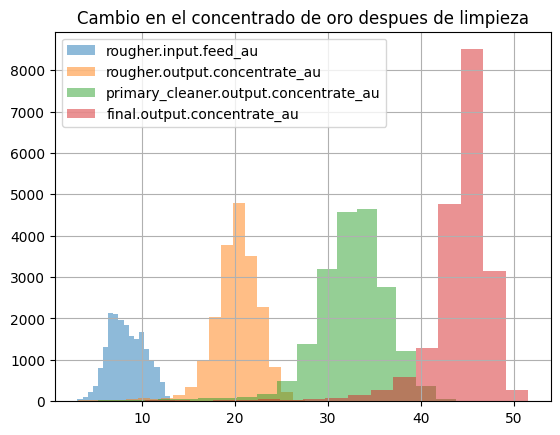

In [98]:
grafico_proceso('au')
plt.title('Cambio en el concentrado de oro despues de limpieza')

Text(0.5, 1.0, 'Cambio en el concentrado de plata')

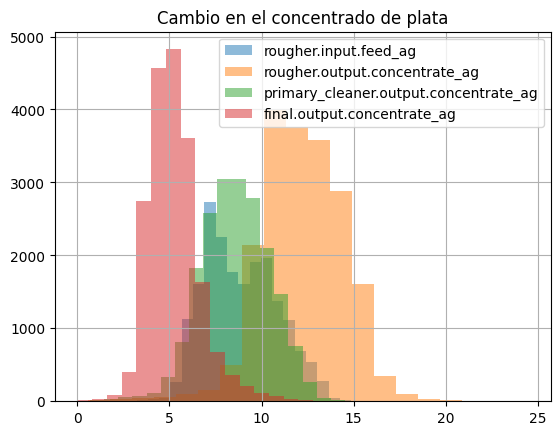

In [99]:
grafico_proceso('ag')
plt.title('Cambio en el concentrado de plata')

In [100]:
#limpieza de datos anomalos
df_full = df_full[~df_full[['rougher.input.feed_ag','rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']].apply(lambda x: x.between(0, 1)).any(axis=1)]

Text(0.5, 1.0, 'Cambio en el concentrado de plata despues de limpieza')

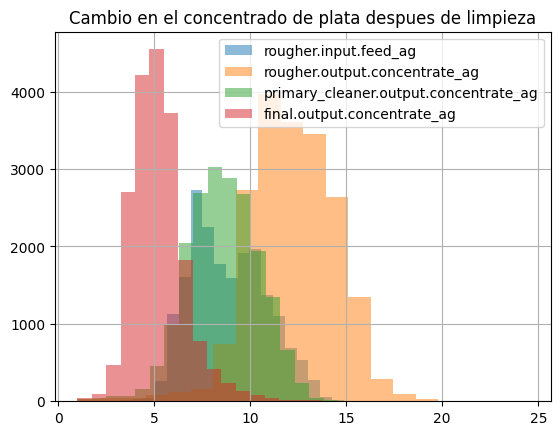

In [101]:
grafico_proceso('ag')
plt.title('Cambio en el concentrado de plata despues de limpieza')

Text(0.5, 1.0, 'Cambio en el concentrado de plomo')

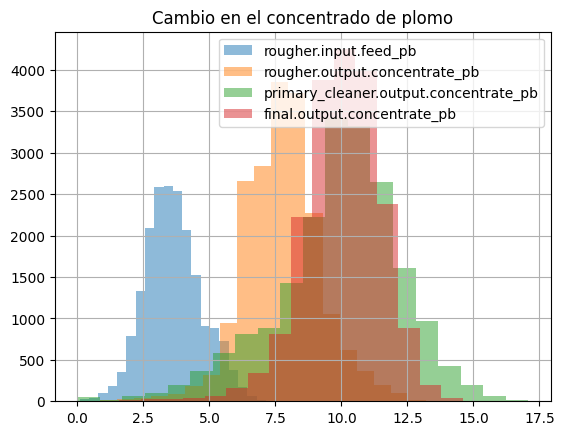

In [102]:
grafico_proceso('pb')
plt.title('Cambio en el concentrado de plomo')

In [103]:
#limpieza de datos anomalos 
df_full = df_full[~df_full[['rougher.input.feed_pb','rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']].apply(lambda x: x.between(0, 1.5)).any(axis=1)]

Text(0.5, 1.0, 'Cambio en el concentrado de plomo')

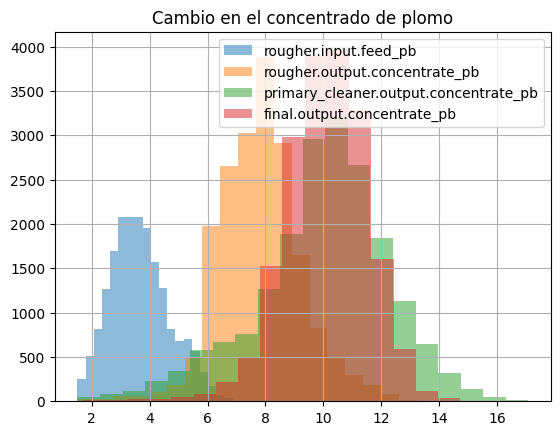

In [104]:
grafico_proceso('pb')
plt.title('Cambio en el concentrado de plomo')

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, podemos apreciar claramente como los procesos realizados aumentan la concentración del oro, mientras que los otros metales experimentan bajas o variaciones menores.

</div>

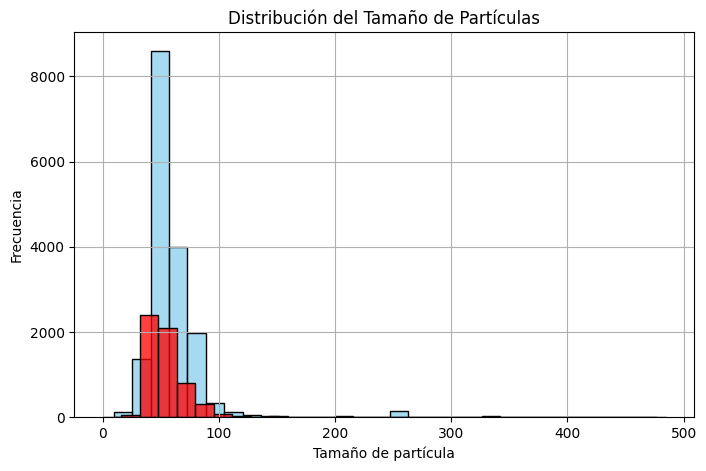

In [105]:
#Comparacion de la distribución de tamaño de partícula
plt.figure(figsize=(8, 5))
sns.histplot(df_train["rougher.input.feed_size"], bins=30, kde=False, color='skyblue')
sns.histplot(df_test["rougher.input.feed_size"], bins=30, kde=False, color='red')
plt.title("Distribución del Tamaño de Partículas")
plt.xlabel("Tamaño de partícula")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcta la comparación entre las dos distribuciones. Si bien podemos hacer test estadísticos para ver que tan similares son, al menos desde un punto de vista del gráfico, sí se ven similares.

</div>

Dado que las distribuciones son similares para los datasets de prueba y entrenamiento, los modelos si se pueden aplicar

In [106]:
## En el paso sigueinte se intento hace una poda de las columnas a incluir en el modelo, sin embargo el SMAPE empeoro
## por lo cual se contempla el uso de todas las columnas
#lista2=list(df_full.columns)
#print(lista2)
#len(lista2)

In [107]:
#lista2=list(df_full.columns)
##print(lista2[45])
#l1=lista2[13:21]  #[9:16]
#l2=l1+lista2[0:9] #[0:5]
#l3=l2+lista2[29:32]  #[33:48]
#l4=l3+lista2[43:51]

#print(l2)

#for i in l4:
  #print(i)

In [108]:
#df_full = pd.DataFrame(df_full, columns=l4)

In [109]:
df_full_copy=df_full.copy()

In [110]:
df_full_copy['rougher_input_total'] = df_full_copy[
    ['rougher.input.feed_au', 'rougher.input.feed_ag', 
     'rougher.input.feed_pb', 'rougher.input.feed_sol']
].sum(axis=1)

df_full_copy['rougher_output_total'] = df_full_copy[
    ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 
     'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']
].sum(axis=1)

df_full_copy['final_output_total'] = df_full_copy[
    ['final.output.concentrate_au', 'final.output.concentrate_ag', 
     'final.output.concentrate_pb', 'final.output.concentrate_sol']
].sum(axis=1)

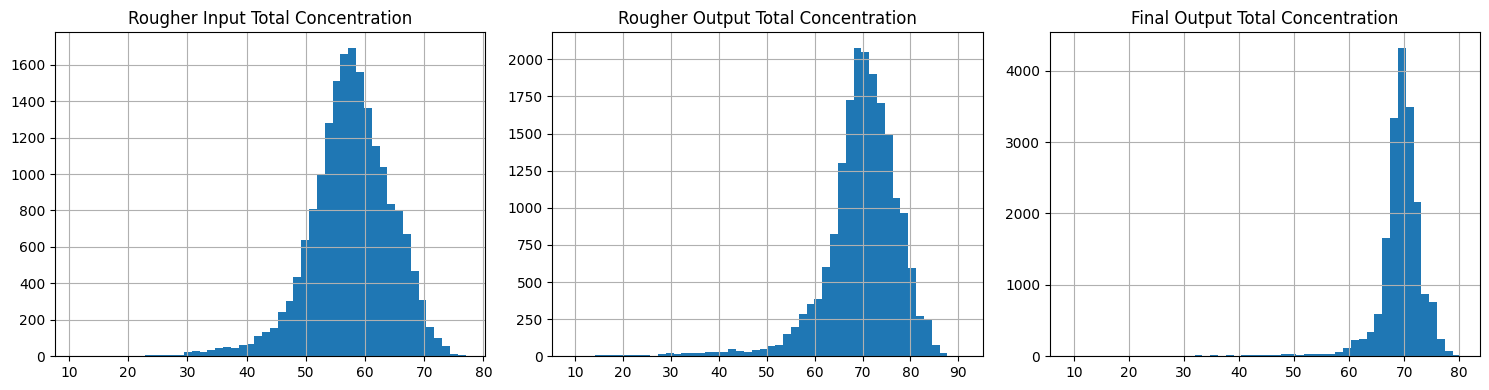

In [111]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
df_full_copy['rougher_input_total'].hist(bins=50)
plt.title('Rougher Input Total Concentration')

plt.subplot(1, 3, 2)
df_full_copy['rougher_output_total'].hist(bins=50)
plt.title('Rougher Output Total Concentration')

plt.subplot(1, 3, 3)
df_full_copy['final_output_total'].hist(bins=50)
plt.title('Final Output Total Concentration')

plt.tight_layout()
plt.show()

In [112]:
# Para rougher_input_total
q1 = df_full_copy['rougher_input_total'].quantile(0.25)
q3 = df_full_copy['rougher_input_total'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_full_copy = df_full_copy[(df_full_copy['rougher_input_total'] >= lower_bound) & (df_full_copy['rougher_input_total'] <= upper_bound)]

# Para 'rougher_output_total'
q1o = df_full_copy['rougher_output_total'].quantile(0.25)
q3o = df_full_copy['rougher_output_total'].quantile(0.75)
iqro = q3o - q1o
lower_bound_o = q1o - 1.5 * iqro
upper_bound_o= q3o + 1.5 * iqro

df_full_copy = df_full_copy[(df_full_copy['rougher_output_total'] >= lower_bound_o) & (df_full_copy['rougher_output_total'] <= upper_bound_o)]

# Para 'final_output_total'
q1ot = df_full_copy['final_output_total'].quantile(0.25)
q3ot = df_full_copy['final_output_total'].quantile(0.75)
iqrot = q3ot - q1ot
lower_bound_ot = q1ot - 1.5 * iqrot
upper_bound_ot= q3ot + 1.5 * iqrot

df_full_copy = df_full_copy[(df_full_copy['final_output_total'] >= lower_bound_ot) & (df_full_copy['final_output_total'] <= upper_bound_ot)]

In [113]:
df_full_copy

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher_input_total,rougher_output_total,final_output_total
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,63.644396
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,67.012710,63.957723
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,50.609929,66.103793,64.311180
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,51.061546,65.752751,63.573449
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,47.859163,65.908382,64.004667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,...,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,53.415050,70.781325,68.098589
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,...,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,53.696482,70.539603,68.274362
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,...,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,54.589604,55.376330,68.226068


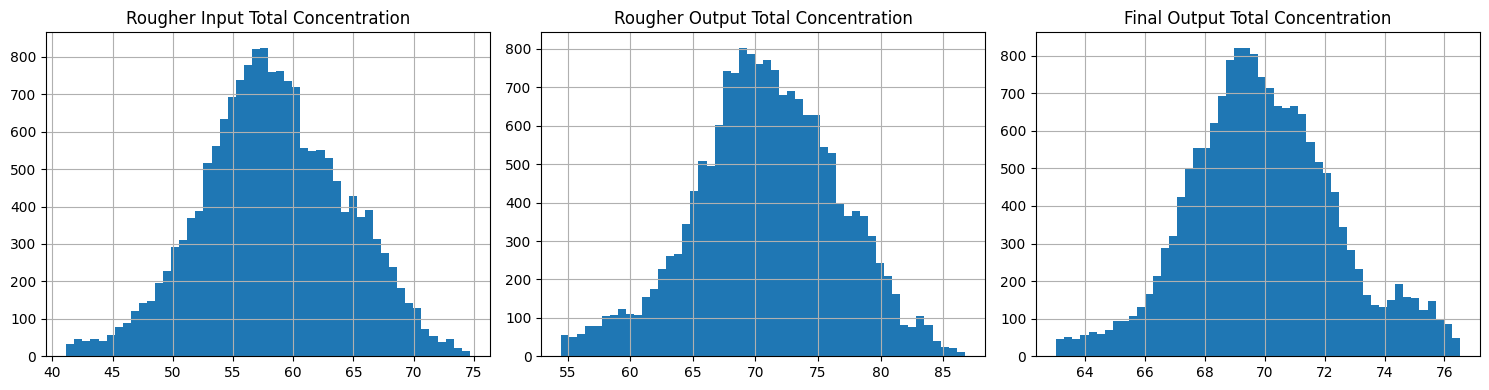

In [114]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
df_full_copy['rougher_input_total'].hist(bins=50)
plt.title('Rougher Input Total Concentration')

plt.subplot(1, 3, 2)
df_full_copy['rougher_output_total'].hist(bins=50)
plt.title('Rougher Output Total Concentration')

plt.subplot(1, 3, 3)
df_full_copy['final_output_total'].hist(bins=50)
plt.title('Final Output Total Concentration')

plt.tight_layout()
plt.show()

In [115]:
#df_full_copy = df_full_copy[(df_full['rougher_input_total'] >= lower_bound) & (df_full['rougher_input_total'] <= upper_bound)]
#df_full_copy = df_full_copy[(df_full['rougher_output_total'] >= lower_bound_o) & (df_full['rougher_output_total'] <= upper_bound_o)]
#df_full_copy = df_full_copy[(df_full['final_output_total'] >= lower_bound_ot) & (df_full['final_output_total'] <= upper_bound_ot)]
#display(df_full_copy.info())

#df_full_copy= df_full_copy[(df_full_copy[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']] >= lower_bound) 
#& (df_full_copy[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']] <= upper_bound)]

#df_full_copy = df_full_copy[(df_full_copy[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']] 
#>= lower_bound_o) & (df_full_copy[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']] <= upper_bound_o)]

#df_full_copy= df_full_copy[(df_full_copy[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']]
#>= lower_bound_ot) & (df_full_copy[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']] <= upper_bound_ot)]

#display(df_full_copy.head())

#intente hacerlo asi sin embargo el operador & espera Series booleanas, no DataFrames, por lo que me arroja NaN a todos los datos.

In [39]:
print(df_full_copy.columns.tolist())

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cle

In [118]:
#cols_input = ['rougher.input.feed_au', 'rougher.input.feed_ag','rougher.input.feed_pb', 'rougher.input.feed_sol']
df_full = df_full[df_full[['rougher.input.feed_au', 'rougher.input.feed_ag','rougher.input.feed_pb', 'rougher.input.feed_sol']].apply(lambda row: row.between(lower_bound, upper_bound).all(), axis=1)]

#cols_output = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag','rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']
df_full = df_full[df_full[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag','rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']].apply(lambda row: row.between(lower_bound_o, upper_bound_o).all(), axis=1)]

#cols_final = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']
df_full= df_full[wsx[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']].apply(lambda row: row.between(lower_bound_ot, upper_bound_ot).all(), axis=1)]

NameError: name 'wsx' is not defined

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer </b> <a class="tocSkip"></a>

Grafica un histograma para el total de la concentración de cada etapa (para de cada etapa rougher.input.feed_{}, rougher.output.concentrate_{} y final.output.concentrate_{}, suma au, ag, pb y sol, serán 3 gráficos, uno para cada etapa). En base a esto, verás de forma más clara donde hay outliers. Revisa cómo removerlos antes de pasar a la parte del modelo.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
Ya removi los outliers de la suma total, ahora falta hacerlo para cada parametro, pero 
</div>




<div class="alert alert-block alert-warning">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

La celda anterior no compila puesto que los filtros realizados dejan vacío el dataframe. No te recomiendo realizar lo anterior, pero dado que usas df_full_copy, las siguientes partes compilan sin problemas. La remoción de outliers mediante el rango intercuartil está bien y funciona correctamente. 

</div>

In [41]:
# segmentación en datos de entrenamiento, validacion y prueba
train_valid, test = train_test_split(df_full_copy, test_size=0.2, random_state=12345)
train, valid = train_test_split(train_valid, test_size=0.3,  random_state=12345)

In [42]:
target_train = train[['final.output.recovery', 'rougher.output.recovery']]
features_train = train.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
target_valid = valid[['final.output.recovery', 'rougher.output.recovery']]
features_valid = valid.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
target_test = test[['final.output.recovery', 'rougher.output.recovery']]
features_test = test.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)

# Prueba de modelos

## Modelo de regresion lineal

In [43]:
state=np.random.RandomState(12345)
def modelo_reg_lin(target_train, features_train, target_valid, features_valid, state):
    
    model = LinearRegression() # inicializa el constructor de modelos
    model.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
    predictions = model.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación
    predictions = pd.DataFrame(predictions, columns=target_train.columns, index=target_valid.index)
   # calcula el sMAPE
    print(predictions.head())
    
    numerador_r = np.abs(target_valid['rougher.output.recovery'] - predictions['rougher.output.recovery'])
    denominador_r = (np.abs(target_valid['rougher.output.recovery']) + np.abs(predictions['rougher.output.recovery'])) / 2.0 
    mask = denominador_r != 0
    smape_rougher= np.mean((numerador_r[mask] / denominador_r[mask])) * 100

    numerador_f = np.abs(target_valid['final.output.recovery'] - predictions['final.output.recovery'])
    denominador_f = (np.abs(target_valid['final.output.recovery']) + np.abs(predictions['final.output.recovery'])) / 2.0
    smape_finout= np.mean((numerador_f[mask] / denominador_f[mask])) * 100
    
    smape_final= 25*smape_rougher + 75*smape_finout

  #Muestra en la pantalla el smape_final del modelo
    print("smape_final", smape_final)

In [44]:
modelo_reg_lin(target_train, features_train, target_valid, features_valid, state)

                     final.output.recovery  rougher.output.recovery
date                                                               
2017-06-21 07:59:59              62.414835                80.011711
2017-05-05 10:59:59              67.592414                82.000755
2018-02-16 19:59:59              69.397772                89.922953
2016-10-05 09:59:59              64.544491                89.269085
2018-02-03 08:59:59              73.168790                87.015203
smape_final 158.1134101692728


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer </b> <a class="tocSkip"></a>

Muy bien, correcto
</div>

## Modelo de arbol de decision para la regresion

In [45]:
# modelo de arbol de decision para regresion model = DecisionTreeRegressor(random_state=54321)
state=np.random.RandomState(12345)
def modelo_destre(target_train, features_train, target_valid, features_valid, state):
    best_depth=0
    best_smape=1000
    for depth in range(1, 11):  # selecciona el rango del hiperparámetro
        model_dtr= DecisionTreeRegressor(random_state=state, max_depth=depth)
        model_dtr.fit(features_train, target_train)
        # <crea un modelo, especifica random_state=54321 y max_depth=depth >
        # < entrena el modelo >
        #train_predictions = model_dtr.predict(features_train) # < predicciones obtenidas con el conjunto de entrenamiento >
        predictions2 = model_dtr.predict(features_valid)
        #test_predictions = model.predict(features_test) # < predicciones obtenidas con el conjunto de prueba>
        #SE UTILIZA HASTA HABER DETERMINADO UN MODELO, despues usar el max_depth que haya salido
        print("SMAPE de max_depth igual a", depth)
            #  f1_train= f1_score(target_train, train_predictions)
            #print("Conjunto de entrenamiento:", f1_train)
        predictions2 = pd.DataFrame(predictions2, columns=target_train.columns, index=target_valid.index)
        numerador_r = np.abs(predictions2['rougher.output.recovery'] - target_valid['rougher.output.recovery'])
        denominador_r = (np.abs(target_valid['rougher.output.recovery']) + np.abs(predictions2['rougher.output.recovery'])) / 2.0 
        mask = denominador_r != 0
        smape_rougher= np.mean((numerador_r[mask] / denominador_r[mask])) * 100

        numerador_f = np.abs(predictions2['final.output.recovery'] - target_valid['final.output.recovery'])
        denominador_f = (np.abs(target_valid['final.output.recovery']) + np.abs(predictions2['final.output.recovery'])) / 2.0
        smape_finout= np.mean((numerador_f[mask] / denominador_f[mask])) * 100
    
        smape_final= 25*smape_rougher + 75*smape_finout
        #f1_valid= f1_score(target_valid,  valid_predictions)
        print("Conjunto de Validación:", smape_final)
        #print()
        if smape_final < best_smape:
            best_smape = smape_final # guarda la mejor puntuación de accuracy en el conjunto de validación
            best_depth = depth # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
        print("smape del mejor modelo en el conjunto de validación (depth= {}): {}".format(best_depth, best_smape))



In [46]:
modelo_destre(target_train, features_train, target_valid, features_valid, state)

SMAPE de max_depth igual a 1
Conjunto de Validación: 747.1345465816579
smape del mejor modelo en el conjunto de validación (depth= 1): 747.1345465816579
SMAPE de max_depth igual a 2
Conjunto de Validación: 651.9519090899154
smape del mejor modelo en el conjunto de validación (depth= 2): 651.9519090899154
SMAPE de max_depth igual a 3
Conjunto de Validación: 579.725687125804
smape del mejor modelo en el conjunto de validación (depth= 3): 579.725687125804
SMAPE de max_depth igual a 4
Conjunto de Validación: 537.0649960971117
smape del mejor modelo en el conjunto de validación (depth= 4): 537.0649960971117
SMAPE de max_depth igual a 5
Conjunto de Validación: 452.2052466783829
smape del mejor modelo en el conjunto de validación (depth= 5): 452.2052466783829
SMAPE de max_depth igual a 6
Conjunto de Validación: 402.59018820618604
smape del mejor modelo en el conjunto de validación (depth= 6): 402.59018820618604
SMAPE de max_depth igual a 7
Conjunto de Validación: 351.358872078668
smape del me

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer </b> <a class="tocSkip"></a>

Buen trabajo, muy bien al probar diferentes parámetros para el modelo
</div>

## Modelo de bosque aleatorio para regresion

In [47]:
#Modelo de bosque aletoria
state=np.random.RandomState(12345)
def modelo_arbar(target_train, features_train, target_valid, features_valid, state):
    best_smape = 1000
    best_est = 0 
    for arboles in range(10,31, 10):
        for ramas in range(1, 30,4): # selecciona el rango del hiperparámetro
            model_ranfore = RandomForestRegressor(random_state=state, n_estimators=arboles, max_depth=ramas) # configura el número de árboles
            model_ranfore.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento

            # Evaluación del modelo
            y_pred= model_ranfore.predict(features_valid) # calcula la puntuación de accuracy en el conjunto de validación
            y_pred = pd.DataFrame(y_pred, columns=target_train.columns, index=target_valid.index)
            print("SMAPE de n_estimator igual a arboles:", arboles, 'ramas:', ramas)
                        
            numerador_r = np.abs(target_valid['rougher.output.recovery'] - y_pred['rougher.output.recovery'])
            denominador_r = (np.abs(target_valid['rougher.output.recovery']) + np.abs(y_pred['rougher.output.recovery'])) / 2.0 
            mask = denominador_r != 0
            smape_rougher= np.mean((numerador_r[mask] / denominador_r[mask])) * 100
            
            numerador_f = np.abs(target_valid['final.output.recovery'] - y_pred['final.output.recovery'])
            denominador_f = (np.abs(target_valid['final.output.recovery']) + np.abs(y_pred['final.output.recovery'])) / 2.0
            smape_finout= np.mean((numerador_f[mask] / denominador_f[mask])) * 100
            smape_final= 25*smape_rougher + 75*smape_finout
            
            print("Conjunto de entrenamiento:", smape_final)

            if smape_final > best_smape:
                best_smape = smape_final # guarda la mejor puntuación de accuracy en el conjunto de validación
                best_est = arboles # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud

    #print("SMAPE del mejor modelo en el conjunto de validación (n_estimators = {}): (ramas= {}): {}".format(best_est,ramas, best_smape))


In [48]:
modelo_arbar(target_train, features_train, target_valid, features_valid, state)

SMAPE de n_estimator igual a arboles: 10 ramas: 1
Conjunto de entrenamiento: 725.413487824627
SMAPE de n_estimator igual a arboles: 10 ramas: 5
Conjunto de entrenamiento: 396.66782155887176
SMAPE de n_estimator igual a arboles: 10 ramas: 9
Conjunto de entrenamiento: 206.62331120095718
SMAPE de n_estimator igual a arboles: 10 ramas: 13
Conjunto de entrenamiento: 139.46271085158185
SMAPE de n_estimator igual a arboles: 10 ramas: 17
Conjunto de entrenamiento: 137.15478266447028
SMAPE de n_estimator igual a arboles: 10 ramas: 21
Conjunto de entrenamiento: 130.91113855417223
SMAPE de n_estimator igual a arboles: 10 ramas: 25
Conjunto de entrenamiento: 141.88210589755394
SMAPE de n_estimator igual a arboles: 10 ramas: 29
Conjunto de entrenamiento: 148.63258035124937
SMAPE de n_estimator igual a arboles: 20 ramas: 1
Conjunto de entrenamiento: 729.0334724867895
SMAPE de n_estimator igual a arboles: 20 ramas: 5
Conjunto de entrenamiento: 390.9565356906899
SMAPE de n_estimator igual a arboles: 2

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer </b> <a class="tocSkip"></a>

Buen trabajo, muy bien al probar diferentes parámetros para el modelo
</div>

# Ensayar con el conjunto de prueba

In [49]:
model_final = RandomForestRegressor(random_state=state, n_estimators=30, max_depth=29) # configura el número de árboles
model_final.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento

# Evaluación del modelo
y_fin= model_final.predict(features_valid) 
y_fin = pd.DataFrame(y_fin, columns=target_train.columns, index=target_valid.index)

                        
numerador_r = np.abs(target_valid['rougher.output.recovery'] - y_fin['rougher.output.recovery'])
denominador_r = (np.abs(target_valid['rougher.output.recovery']) + np.abs(y_fin['rougher.output.recovery'])) / 2.0 
mask = denominador_r != 0
smape_rougher= np.mean((numerador_r[mask] / denominador_r[mask])) * 100
           
numerador_f = np.abs(target_valid['final.output.recovery'] - y_fin['final.output.recovery'])
denominador_f = (np.abs(target_valid['final.output.recovery']) + np.abs(y_fin['final.output.recovery'])) / 2.0
smape_finout= np.mean((numerador_f[mask] / denominador_f[mask])) * 100
smape_final= 25*smape_rougher + 75*smape_finout
            
print("Conjunto de prueba SMAPE:", smape_final)## Modelo de bosque aleatorio

Conjunto de prueba SMAPE: 128.72098599999143


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer </b> <a class="tocSkip"></a>

Muy bien, correcto
</div>

## Conclusiones
El modelo de random forest regression nos dio el mejor error marcado, y en el conjunto de prueba dio de un 159%, sin embargo sigue siendo muy alto.